In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Customer Info

In [2]:
customer_info_df = pd.read_excel('./data/dataset/CUSTOMER INFO_PJDSC.xlsx')
customer_info_df.head()

,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,IDV_OR_ORG,SEGMENT,SUBSEGMENT,GENDER,MARITAL_STATUS
0,11712.654012,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.833333,N,DIGITAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
1,436.605085,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,21.0,4.250000,N,NO_DATA,SALARY,1,3,CORE MASS,FEMALE,SINGLE
2,921.989154,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,23.0,2.000000,N,TRADITIONAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
3,1119.634762,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),LOW,13.0,5.583333,N,TRADITIONAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
4,1709.755538,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.250000,N,DIGITAL,SALARY,1,3,CORE MASS,FEMALE,SINGLE


In [3]:
customer_info_df.columns = [feat.lower() for feat in customer_info_df.columns]

In [4]:
customer_info_df.nunique()

cust_num          46148
province             45
region               14
education             4
age                 106
tenure              307
business_owner        2
digital_flag          3
income_source        12
idv_or_org            1
segment               1
subsegment            1
gender                3
marital_status        6
dtype: int64

From here, we remove all features that only contains one value.

It is worth-noting that the `CUST_NUM` feature is not unique to all 138444 customers.

In [5]:
customer_info_df.drop(labels=['idv_or_org', 'segment', 'subsegment'], axis=1, inplace=True)

In [6]:
customer_info_df.shape

(138444, 11)

In [26]:
customer_info_df.describe(include='all')

,cust_num,province,region,education,age,tenure,business_owner,digital_flag,income_source,gender,marital_status
count,138444.000000,138444,138444,138444.000000,138378.000000,138444.000000,138444.000000,138444,138444,138444,138444
unique,NaN,45,14,NaN,NaN,NaN,NaN,3,12,3,6
top,NaN,NEGROS OCCIDENTAL,REGION VI (WESTERN VISAYAS),NaN,NaN,NaN,NaN,TRADITIONAL,SALARY,FEMALE,SINGLE
freq,NaN,13488,20508,NaN,NaN,NaN,NaN,64695,84531,80298,80310
mean,9424.785491,NaN,NaN,0.782309,40.255496,6.280592,0.049775,NaN,NaN,NaN,NaN
std,3337.146487,NaN,NaN,0.456079,15.712651,5.241069,0.217480,NaN,NaN,NaN,NaN
min,85.229103,NaN,NaN,0.000000,1.000000,0.083333,0.000000,NaN,NaN,NaN,NaN
25%,7064.942498,NaN,NaN,1.000000,28.000000,2.166667,0.000000,NaN,NaN,NaN,NaN
50%,10000.653129,NaN,NaN,1.000000,36.000000,5.083333,0.000000,NaN,NaN,NaN,NaN
75%,12247.160446,NaN,NaN,1.000000,49.000000,9.000000,0.000000,NaN,NaN,NaN,NaN


In [27]:
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138444 entries, 0 to 138443
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   cust_num        138444 non-null  float64
 1   province        138444 non-null  object 
 2   region          138444 non-null  object 
 3   education       138444 non-null  float64
 4   age             138378 non-null  float64
 5   tenure          138444 non-null  float64
 6   business_owner  138444 non-null  int64  
 7   digital_flag    138444 non-null  object 
 8   income_source   138444 non-null  object 
 9   gender          138444 non-null  object 
 10  marital_status  138444 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 11.6+ MB


We check if there are `NULL` values on any feature.

As we can see, the `age` feature contains `NULL` values but this doesn't mean that the other features won't contain `NULL` data.

## Categorical Feature Encoding

In [9]:
business_owner_mapping = {'Y': 1, 'N': 0}
customer_info_df['business_owner'] = customer_info_df['business_owner'].map(business_owner_mapping)
customer_info_df['business_owner']

0         0
1         0
2         0
3         0
4         0
         ..
138439    0
138440    0
138441    0
138442    0
138443    0
Name: business_owner, Length: 138444, dtype: int64

## Preliminary Analysis

### Province

In [10]:
customer_info_df['province'].value_counts()

province
NEGROS OCCIDENTAL                 13488
MISAMIS ORIENTAL                   9783
PANGASINAN                         8841
BENGUET                            8214
ZAMBALES                           5742
ZAMBOANGA DEL SUR                  5310
SOUTH COTABATO                     5262
NEGROS ORIENTAL                    5034
LEYTE                              4845
NUEVA ECIJA                        4836
BOHOL                              4206
CAMARINES SUR                      4044
TARLAC                             4020
ISABELA                            3792
ALBAY                              3546
LA UNION                           3462
DAVAO DEL NORTE                    3432
ILOCOS NORTE                       3363
CAGAYAN                            3111
AKLAN                              3102
BATAAN                             2727
CAPIZ                              2634
LANAO DEL NORTE                    2460
PALAWAN                            2397
AGUSAN DEL NORTE               

Based from the values taken by the `province` feature, we can see that there are some interesting values that were inputted from customer inputs such as SAMAR (WESTERN SAMAR), COTABATO (NORTH COTABATO) and COTABATO CITY (NOT A PROVINCE). We can map SAMAR (WESTERN SAMAR) into WESTERN SAMAR and COTABATO (NORTH COTABATO) into NORTH COTABATO.

For the case of COTABATO CITY, we included it as a province since there might be misrepresentations that may occur for that province.

In [11]:
province_mapper = {'SAMAR (WESTERN SAMAR)': 'WESTERN SAMAR', 'COTABATO (NORTH COTABATO)': 'NORTH COTABATO', 'COTABATO CITY (NOT A PROVINCE)': 'COTABATO CITY'}
for i in customer_info_df['province'].unique():
    if not i in province_mapper:
        province_mapper[i] = i
customer_info_df['province'] = customer_info_df['province'].map(province_mapper)

In [12]:
customer_info_df['province'].value_counts()

province
NEGROS OCCIDENTAL      13488
MISAMIS ORIENTAL        9783
PANGASINAN              8841
BENGUET                 8214
ZAMBALES                5742
ZAMBOANGA DEL SUR       5310
SOUTH COTABATO          5262
NEGROS ORIENTAL         5034
LEYTE                   4845
NUEVA ECIJA             4836
BOHOL                   4206
CAMARINES SUR           4044
TARLAC                  4020
ISABELA                 3792
ALBAY                   3546
LA UNION                3462
DAVAO DEL NORTE         3432
ILOCOS NORTE            3363
CAGAYAN                 3111
AKLAN                   3102
BATAAN                  2727
CAPIZ                   2634
LANAO DEL NORTE         2460
PALAWAN                 2397
AGUSAN DEL NORTE        2364
BUKIDNON                2319
ILOCOS SUR              1893
MISAMIS OCCIDENTAL      1497
ZAMBOANGA DEL NORTE     1320
ANTIQUE                 1284
NORTH COTABATO          1191
NUEVA VIZCAYA           1119
CAMARINES NORTE         1098
SURIGAO DEL NORTE       1068
ORIEN

### Region

In [13]:
customer_info_df['region'].value_counts()

region
REGION VI (WESTERN VISAYAS)               20508
REGION I (ILOCOS REGION)                  17559
REGION III (CENTRAL LUZON)                17325
REGION X (NORTHERN MINDANAO)              16059
REGION V (BICOL REGION)                    9633
REGION VII (CENTRAL VISAYAS)               9240
CORDILLERA ADMINISTRATIVE REGION (CAR)     8214
REGION II (CAGAYAN VALLEY)                 8022
REGION XII (SOCCSKSARGEN)                  7932
REGION IX (ZAMBOANGA PENINSULA)            6630
REGION VIII (EASTERN VISAYAS)              5844
REGION XIII (CARAGA)                       4143
REGION XI (DAVAO REGION)                   3885
MIMAROPA REGION                            3450
Name: count, dtype: int64

There are also minor modifications that can be done for the `region` feature.

In [14]:
region_mapper = {'MIMAROPA REGION': 'REGION IV-B (MIMAROPA REGION)'}
for i in customer_info_df['region'].unique():
    if not i in region_mapper:
        region_mapper[i] = i
customer_info_df['region'] = customer_info_df['region'].map(region_mapper)

In [15]:
customer_info_df['region'].value_counts()

region
REGION VI (WESTERN VISAYAS)               20508
REGION I (ILOCOS REGION)                  17559
REGION III (CENTRAL LUZON)                17325
REGION X (NORTHERN MINDANAO)              16059
REGION V (BICOL REGION)                    9633
REGION VII (CENTRAL VISAYAS)               9240
CORDILLERA ADMINISTRATIVE REGION (CAR)     8214
REGION II (CAGAYAN VALLEY)                 8022
REGION XII (SOCCSKSARGEN)                  7932
REGION IX (ZAMBOANGA PENINSULA)            6630
REGION VIII (EASTERN VISAYAS)              5844
REGION XIII (CARAGA)                       4143
REGION XI (DAVAO REGION)                   3885
REGION IV-B (MIMAROPA REGION)              3450
Name: count, dtype: int64

### Education

In [16]:
customer_info_df['education'].value_counts()

education
MID        63396
NO_DATA    39690
LOW        32748
HIGH        2610
Name: count, dtype: int64

As we can see from the count, we might need to impute the missing values for the `education` feature.

In [17]:
education_mapper = {'LOW': 0, 'MID': 1, 'HIGH': 2, 'NO_DATA': np.nan}

In [18]:
customer_info_df['education'] = customer_info_df['education'].map(education_mapper)

In [19]:
customer_info_df['education'].fillna(1, inplace=True)
customer_info_df['education'].value_counts()

education
1.0    103086
0.0     32748
2.0      2610
Name: count, dtype: int64

### Age

In [20]:
customer_info_df['age'].value_counts()

age
27.0     5499
28.0     5481
26.0     5391
29.0     5310
30.0     5088
         ... 
1.0         3
104.0       3
4.0         3
108.0       3
3.0         3
Name: count, Length: 106, dtype: int64

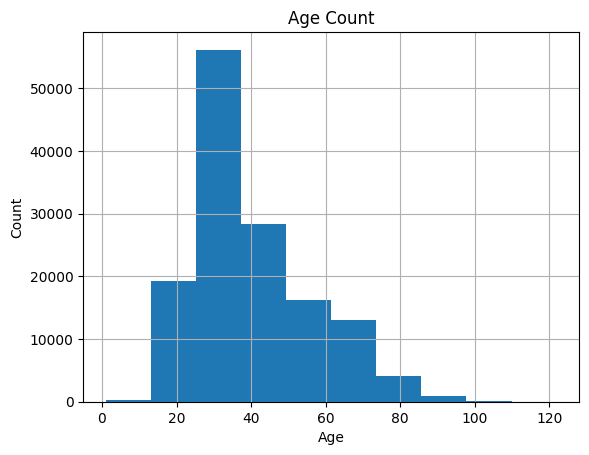

In [21]:
customer_info_df['age'].hist()
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

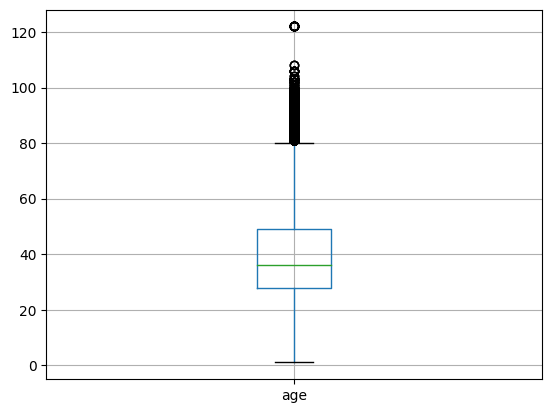

In [24]:
customer_info_df.boxplot(column=['age'])
plt.show()

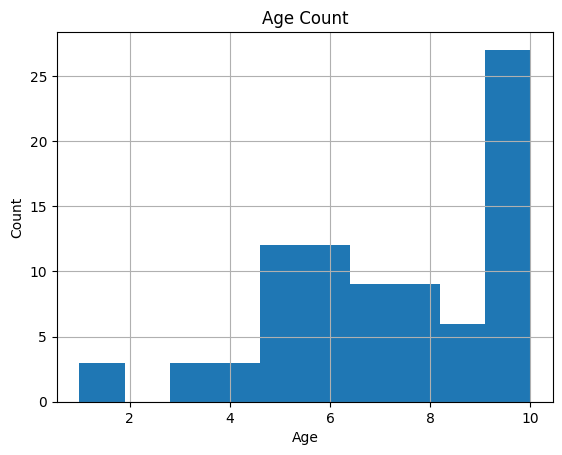

In [30]:
customer_info_df[customer_info_df['age'] <= 10]['age'].hist()
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [32]:
customer_info_df[customer_info_df['age'] <= 5]['cust_num']

1033     13892.537709
1702      7477.527934
2221     11551.479732
2841     12720.959241
3021     11714.077172
3238      4179.359281
3260      1886.584745
47181    13892.537709
47850     7477.527934
48369    11551.479732
48989    12720.959241
49169    11714.077172
49386     4179.359281
49408     1886.584745
93329    13892.537709
93998     7477.527934
94517    11551.479732
95137    12720.959241
95317    11714.077172
95534     4179.359281
95556     1886.584745
Name: cust_num, dtype: float64

## Tenure

In [66]:
customer_info_df['tenure'].value_counts()

tenure
0.916667     1833
0.333333     1797
0.833333     1785
0.750000     1773
0.666667     1755
             ... 
27.000000       3
25.833333       3
26.583333       3
26.916667       3
23.083333       3
Name: count, Length: 307, dtype: int64

### Business Owner

In [68]:
customer_info_df['business_owner'].value_counts()

business_owner
0    131553
1      6891
Name: count, dtype: int64

### Digital Flag

In [69]:
customer_info_df['digital_flag'].value_counts()

digital_flag
TRADITIONAL    64695
NO_DATA        41775
DIGITAL        31974
Name: count, dtype: int64

### Income Source

In [72]:
customer_info_df['income_source'].value_counts()

income_source
SALARY                                     84531
ALLOWANCE                                  18357
PENSION                                    11055
REMITTANCE                                 10581
BUSINESS                                    7818
OTHER_SOURCES_NOT_SPECIFIED                 2181
NO_DATA                                     1830
COMMISSION                                  1533
ECONOMICALLY_INACTIVE                        300
INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS      234
DONATION                                      21
CAMPAIGN_FUND                                  3
Name: count, dtype: int64

### Gender

In [70]:
customer_info_df['gender'].value_counts()

gender
FEMALE    80298
MALE      55380
OTHERS     2766
Name: count, dtype: int64

In [26]:
gender_mapper = {'OTHERS': 0, 'MALE': 1, 'FEMALE': 2}
customer_info_df['gender'] = customer_info_df['gender'].map(gender_mapper)

Note: Di ko nagagawang graph. Basta mas maraming babae ang gumagamit.

### Marital Status

In [73]:
customer_info_df['marital_status'].value_counts()

marital_status
SINGLE       80310
MARRIED      48459
WIDOWED       4149
DIVORCED      2769
SEPARATED     1395
OTHERS        1362
Name: count, dtype: int64

In [30]:
marital_status_mapper, cur = {}, 0
for i in customer_info_df['marital_status'].unique():
    marital_status_mapper[i], cur = cur, cur+1
customer_info_df['marital_status'] = customer_info_df['marital_status'].map(marital_status_mapper)

In [31]:
customer_info_df['marital_status'].value_counts()

marital_status
0    80310
1    48459
2     4149
3     2769
5     1395
4     1362
Name: count, dtype: int64

In [32]:
marital_status_mapper

{'SINGLE': 0,
 'MARRIED': 1,
 'WIDOWED': 2,
 'DIVORCED': 3,
 'OTHERS': 4,
 'SEPARATED': 5}

Add correlation matrix dito.

## Bivariate Analysis

In [75]:
customer_info_df.corr(method='pearson', numeric_only=True)

,cust_num,age,tenure,business_owner
cust_num,1.000000,0.002227,0.005340,0.001467
age,0.002227,1.000000,0.461876,0.124741
tenure,0.005340,0.461876,1.000000,0.119844
business_owner,0.001467,0.124741,0.119844,1.000000


<Axes: >

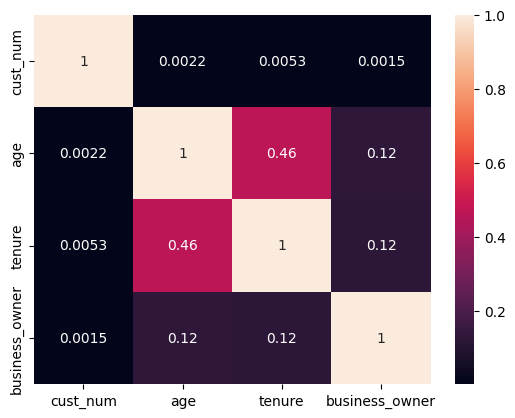

In [79]:
sns.heatmap(data=customer_info_df.corr(method='pearson', numeric_only=True), annot=True)

Need nga imap lahat ng categorical variables para macorrelate.